In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-07-04 02:17:02.435897: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 02:17:02.464215: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 02:17:02.466750: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 02:17:02.474644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 02:17:02.490129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# Example data: sequences with 3 features each and 2 output dimensions
X_train = np.random.randn(100, 10, 3)  # 100 sequences of length 10 with 3 features
y_train = np.random.randn(100, 2)      # 100 sequences with 2 output values per sequence

In [3]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10, 3)))  # 50 LSTM units, input shape (sequence_length, num_features)
model.add(Dense(2))  # Output layer with 2 units (since we have 2 output dimensions)

model.compile(optimizer='adam', loss='mse')  # Use mean squared error for regression task

/mnt/c/Users/hieunt/python/Lab/model-poshap/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2065  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1424 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1191 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2518 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2613 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1811 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3168 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1442 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2311 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2036 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


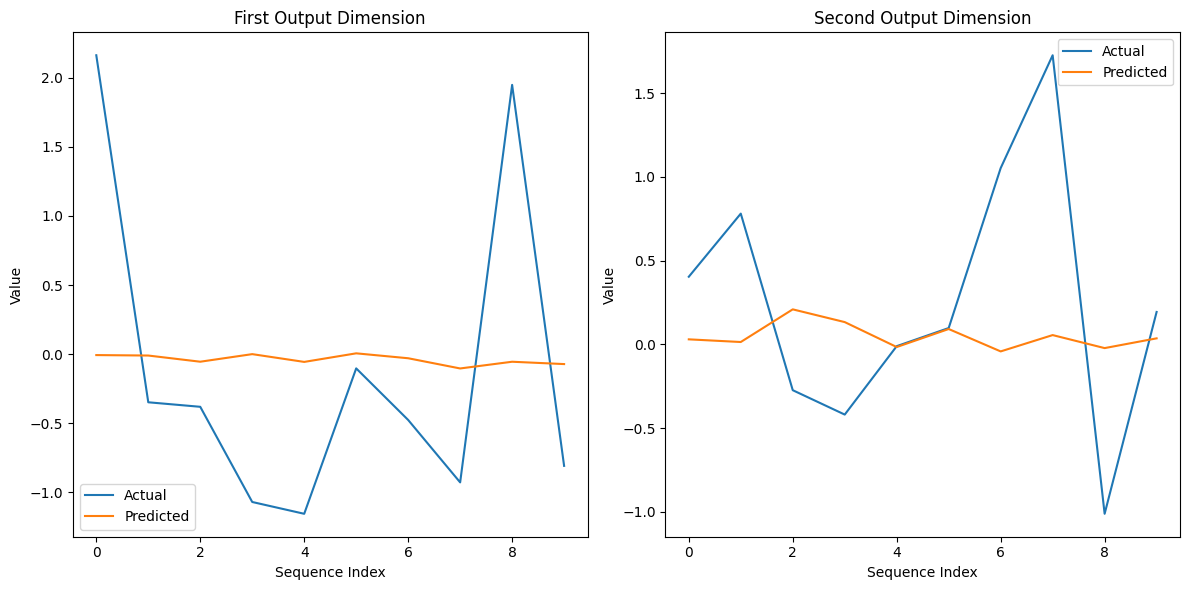

In [5]:

# Generate some new data for prediction
X_new = np.random.randn(10, 10, 3)  # New input sequence of length 10 with 3 features each
y_actual = np.random.randn(10, 2)   # Actual output values for the new input sequences

# Predict the output
y_pred = model.predict(X_new)

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Plotting first output dimension
plt.subplot(1, 2, 1)
plt.plot(y_actual[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('First Output Dimension')
plt.xlabel('Sequence Index')
plt.ylabel('Value')
plt.legend()

# Plotting second output dimension
plt.subplot(1, 2, 2)
plt.plot(y_actual[:, 1], label='Actual')
plt.plot(y_pred[:, 1], label='Predicted')
plt.title('Second Output Dimension')
plt.xlabel('Sequence Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

x_train = pd.read_table('Data/20201230_all5_xtrain.txt', sep=' ', header=None)
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,11.0,6.0,6.0,0.0,8.0,16.0,11.0,15.0,4.0,4.0
1,11.0,6.0,6.0,0.0,8.0,16.0,11.0,15.0,15.0,4.0
2,11.0,6.0,6.0,0.0,8.0,16.0,11.0,15.0,15.0,16.0
3,16.0,16.0,7.0,3.0,15.0,3.0,3.0,3.0,4.0,4.0
4,16.0,16.0,7.0,3.0,15.0,3.0,3.0,3.0,10.0,4.0
5,16.0,16.0,7.0,3.0,15.0,3.0,3.0,3.0,10.0,15.0
6,5.0,14.0,14.0,16.0,9.0,12.0,16.0,9.0,4.0,4.0
7,5.0,14.0,14.0,16.0,9.0,12.0,16.0,9.0,5.0,4.0
8,5.0,14.0,14.0,16.0,9.0,12.0,16.0,9.0,5.0,9.0
9,15.0,14.0,8.0,7.0,16.0,8.0,16.0,3.0,4.0,4.0


In [2]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Embedding(input_dim=21, output_dim=50),

    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.4839),

    keras.layers.LSTM(128, return_sequences=False),
    keras.layers.Dropout(0.1829),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.LeakyReLU(alpha=0.1),

    keras.layers.Dropout(0.1176),
    keras.layers.Dense(5, activation='softmax')
])


2024-07-18 05:29:31.610201: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 05:29:31.650824: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 05:29:31.658777: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 05:29:31.676718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 05:29:31.716231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [3]:
from tensorflow.keras.utils import plot_model

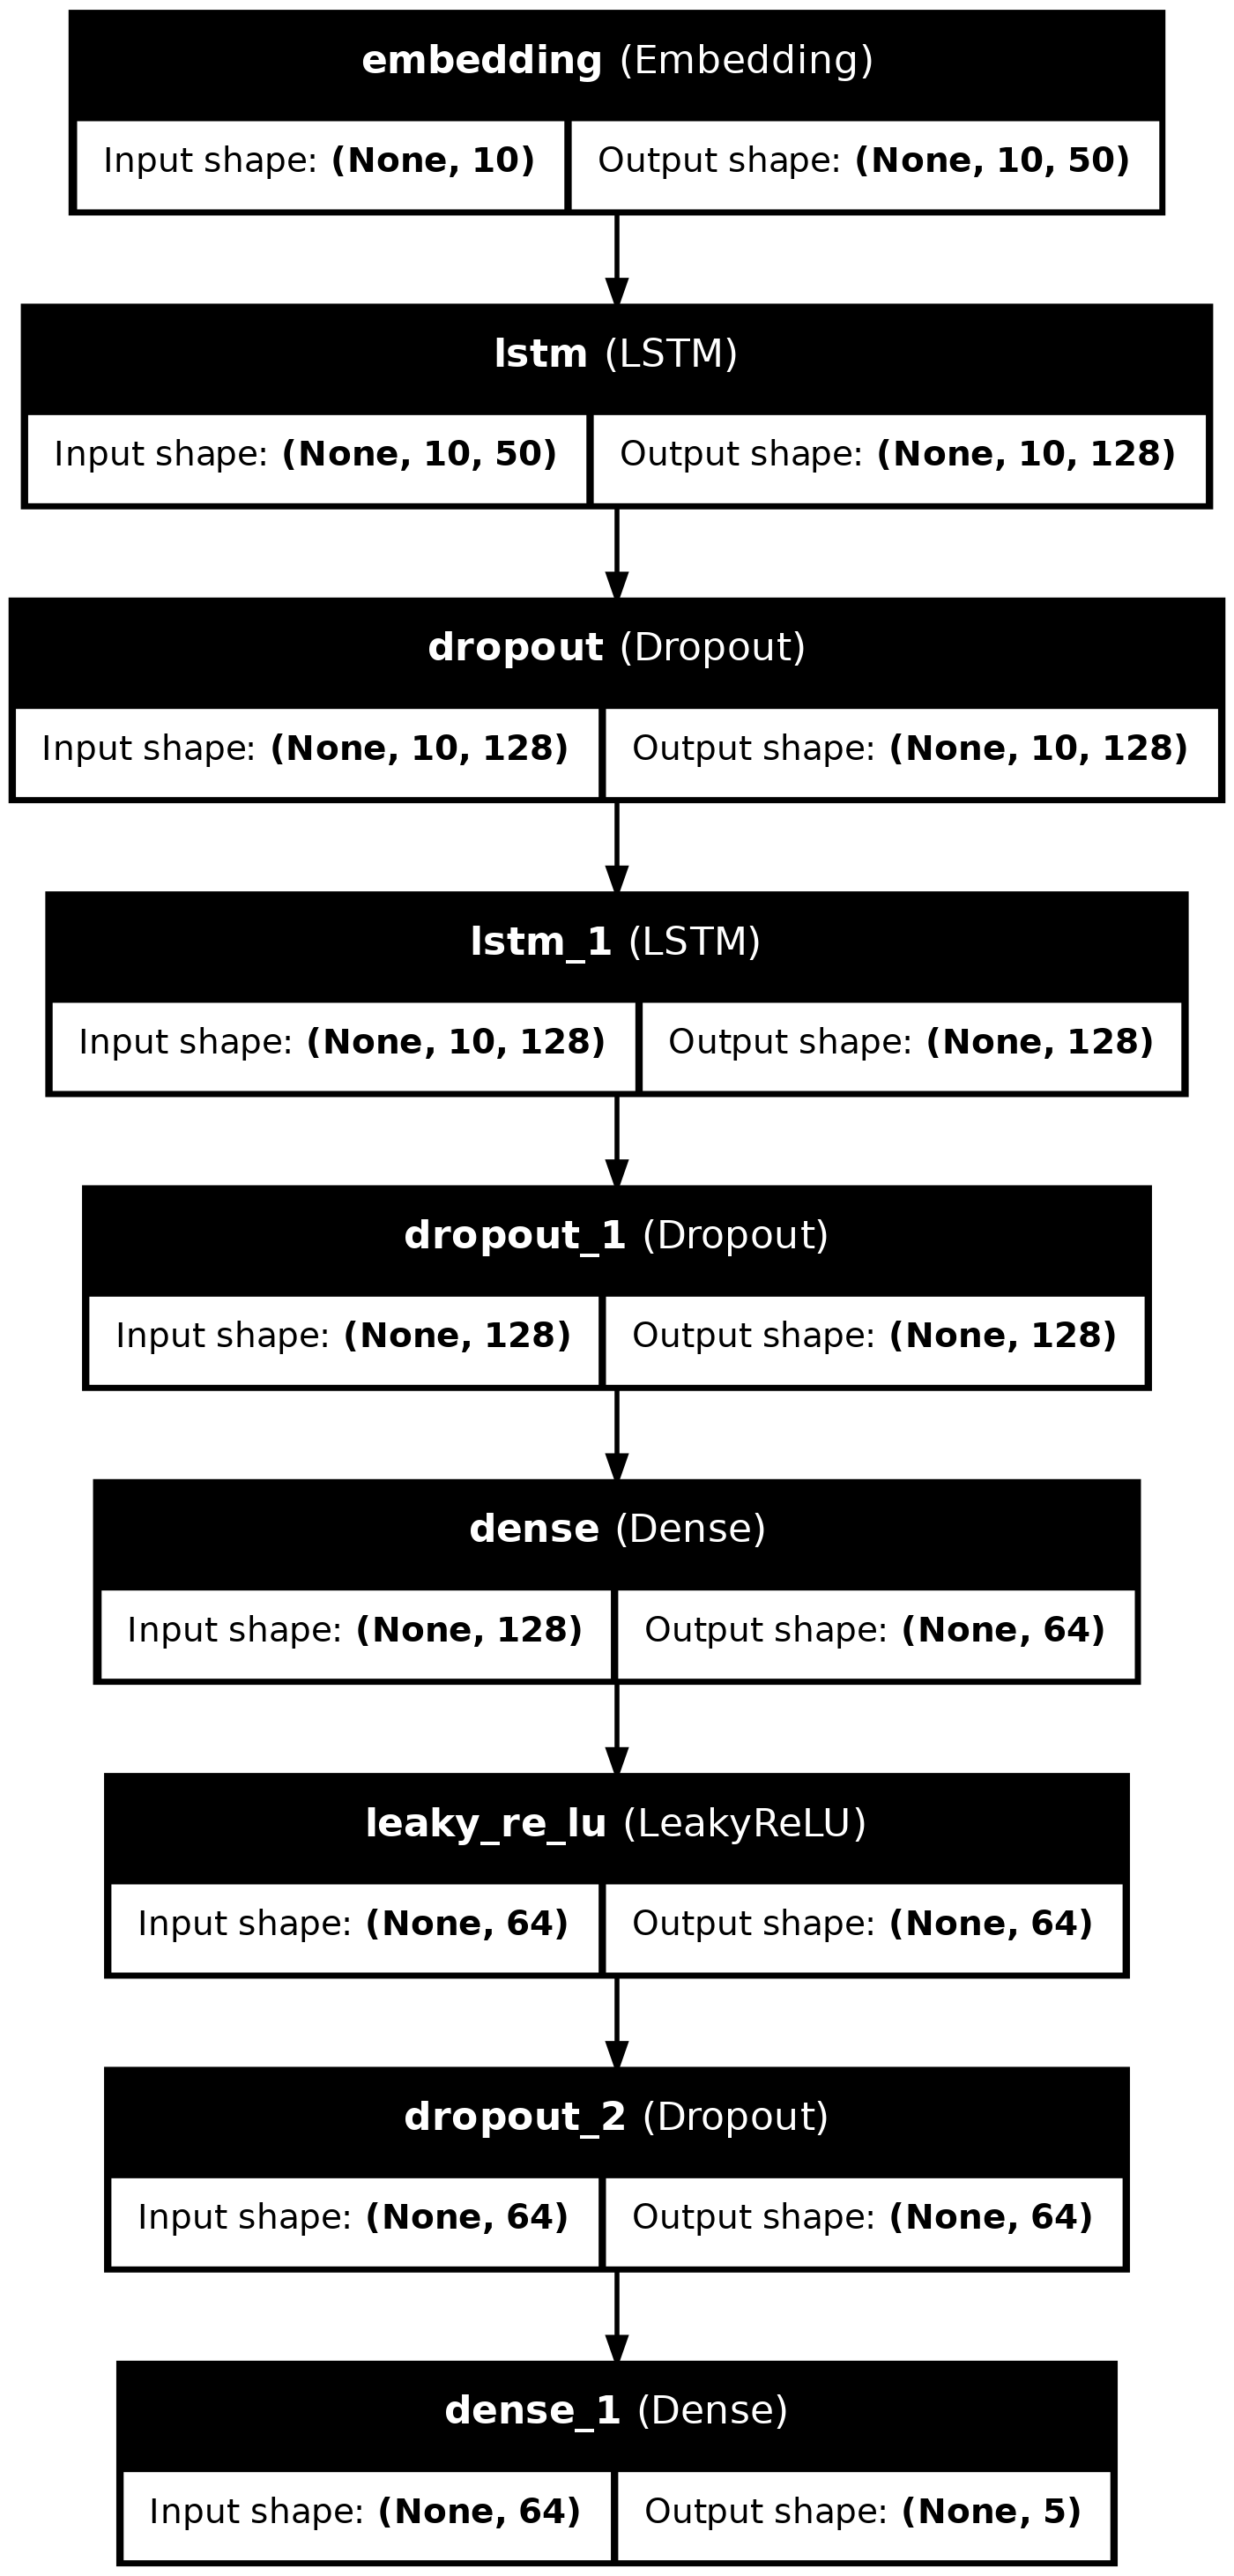

In [5]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)